In [94]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import plotly.express as px


# TDMb movies data gathering using API

In [40]:
import requests

In [47]:
import requests
import pandas as pd
df_list = []

for i in range(1, 479):
    response = requests.get("https://api.themoviedb.org/3/movie/top_rated?api_key=4f7727e555cad72c613c5a1f8c8ece44&page={}".format(i))
    Temp_df = pd.DataFrame(response.json()['results'])[['id', 'original_title', 'popularity', 'release_date', 'vote_average', 'vote_count', 'overview']]
    df_list.append(Temp_df)



In [48]:
df = pd.concat(df_list, ignore_index=True)


In [49]:
df

,id,original_title,popularity,release_date,vote_average,vote_count,overview
0,278,The Shawshank Redemption,150.576,1994-09-23,8.706,26596,Imprisoned in the 1940s for the double murder ...
1,238,The Godfather,386.488,1972-03-14,8.700,20184,"Spanning the years 1945 to 1955, a chronicle o..."
2,240,The Godfather Part II,102.931,1974-12-20,8.600,12180,In the continuing saga of the Corleone crime f...
3,424,Schindler's List,76.169,1993-12-15,8.565,15583,The true story of how businessman Oskar Schind...
4,389,12 Angry Men,53.155,1957-04-10,8.543,8431,The defense and the prosecution have rested an...
...,...,...,...,...,...,...,...
9553,12142,Alone in the Dark,13.579,2005-01-28,3.200,592,Edward Carnby is a private investigator specia...
9554,13805,Disaster Movie,20.064,2008-08-29,3.181,1009,"Over the course of one evening, an unsuspectin..."
9555,11059,House of the Dead,26.954,2003-04-11,3.139,375,"Set on an island off the coast, a techno rave ..."
9556,14164,Dragonball Evolution,20.315,2009-03-12,2.895,2004,"On his 18th birthday, Goku receives a mystical..."


In [51]:
df.to_csv('tmdb data gathering using API.csv')

In [52]:
movies=pd.read_csv('tmdb data gathering using API.csv')

In [53]:
movies

,Unnamed: 0,id,original_title,popularity,release_date,vote_average,vote_count,overview
0,0,278,The Shawshank Redemption,150.576,1994-09-23,8.706,26596,Imprisoned in the 1940s for the double murder ...
1,1,238,The Godfather,386.488,1972-03-14,8.700,20184,"Spanning the years 1945 to 1955, a chronicle o..."
2,2,240,The Godfather Part II,102.931,1974-12-20,8.600,12180,In the continuing saga of the Corleone crime f...
3,3,424,Schindler's List,76.169,1993-12-15,8.565,15583,The true story of how businessman Oskar Schind...
4,4,389,12 Angry Men,53.155,1957-04-10,8.543,8431,The defense and the prosecution have rested an...
...,...,...,...,...,...,...,...,...
9553,9553,12142,Alone in the Dark,13.579,2005-01-28,3.200,592,Edward Carnby is a private investigator specia...
9554,9554,13805,Disaster Movie,20.064,2008-08-29,3.181,1009,"Over the course of one evening, an unsuspectin..."
9555,9555,11059,House of the Dead,26.954,2003-04-11,3.139,375,"Set on an island off the coast, a techno rave ..."
9556,9556,14164,Dragonball Evolution,20.315,2009-03-12,2.895,2004,"On his 18th birthday, Goku receives a mystical..."


In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9558 entries, 0 to 9557
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9558 non-null   int64  
 1   id              9558 non-null   int64  
 2   original_title  9558 non-null   object 
 3   popularity      9558 non-null   float64
 4   release_date    9558 non-null   object 
 5   vote_average    9558 non-null   float64
 6   vote_count      9558 non-null   int64  
 7   overview        9556 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 597.5+ KB


In [113]:
parts=movies['original_title'].value_counts(ascending=False).reset_index().head(30)

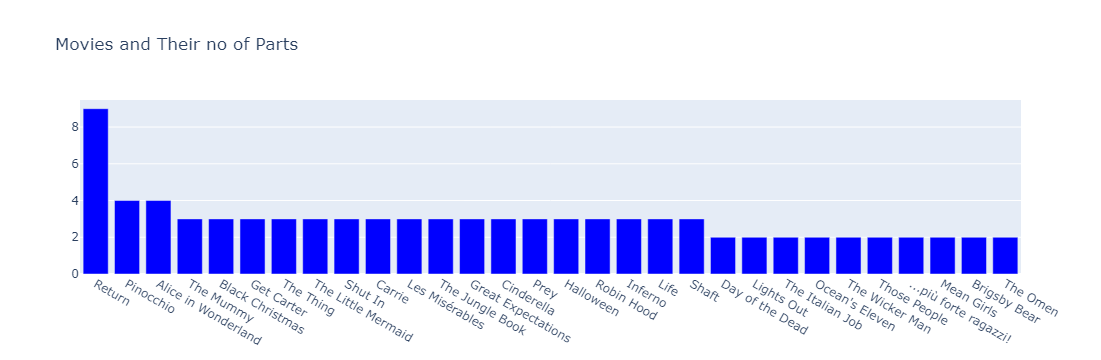

In [114]:
trace=go.Bar(x=parts['original_title'],y=parts['count'],marker=dict(color='blue'))
data = [trace]
layout = go.Layout(title='Movies and Their no of Parts')
fig = go.Figure(data=data, layout=layout)

fig.show()

In [84]:
movies[movies['original_title']=='The Mummy']

,Unnamed: 0,id,original_title,popularity,release_date,vote_average,vote_count,overview
3537,3537,564,The Mummy,137.897,1999-04-16,6.931,8877,Dashing legionnaire Rick O'Connell stumbles up...
4252,4252,15849,The Mummy,15.875,1932-12-22,6.771,595,An ancient Egyptian priest named Imhotep is re...
8838,8838,282035,The Mummy,57.149,2017-06-06,5.510,7068,Though safely entombed in a crypt deep beneath...


In [129]:
top=movies[movies['vote_average'] > 7][['original_title','vote_average']].sort_values(by='vote_average',ascending=False).reset_index().head(20)
top

,index,original_title,vote_average
0,0,The Shawshank Redemption,8.706
1,1,The Godfather,8.700
2,2,The Godfather Part II,8.600
3,3,Schindler's List,8.565
4,4,12 Angry Men,8.543
5,7,The Dark Knight,8.516
6,8,기생충,8.507
7,9,The Green Mile,8.506
8,6,दिलवाले दुल्हनिया ले जायेंगे,8.500
9,5,千と千尋の神隠し,8.500


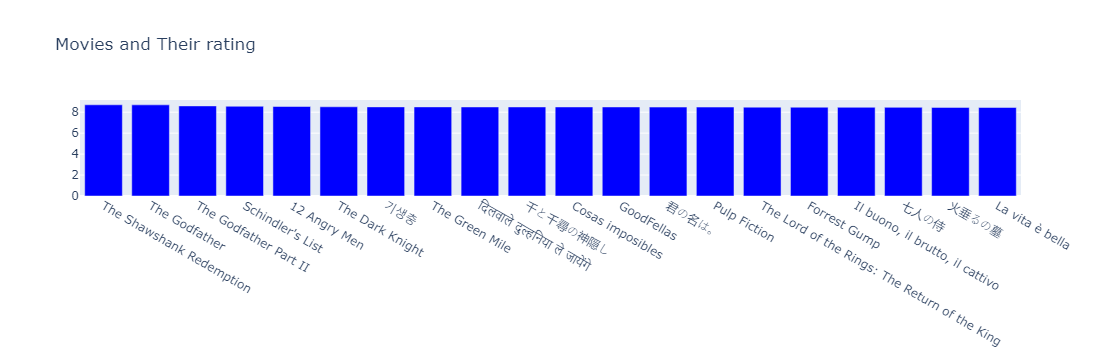

In [131]:
trace=go.Bar(x=top['original_title'],y=top['vote_average'],marker=dict(color='blue'))
data = [trace]
layout = go.Layout(title='Movies and Their rating')
fig = go.Figure(data=data, layout=layout)

fig.show()

# data from Rapid using API

In [144]:
import http.client
import json
import pandas as pd

conn = http.client.HTTPSConnection("real-time-amazon-data.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "8f32f5dfb5mshb013aed486980dap16f9c9jsn126d47ed5694",
    'x-rapidapi-host': "real-time-amazon-data.p.rapidapi.com"
}

conn.request("GET", "/products-by-category?category_id=2478868012&page=1&country=US&sort_by=RELEVANCE&product_condition=ALL&is_prime=false", headers=headers)

res = conn.getresponse()
data = res.read()

data_str = data.decode("utf-8")
data_json = json.loads(data_str)

products = data_json['data']['products']

df = pd.DataFrame(products)

df.reset_index()


,index,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,unit_price,unit_count
0,0,B0CWXNS552,Apple AirTag,$24.99,$29.00,USD,4.6,5423,https://www.amazon.com/dp/B0CWXNS552,https://m.media-amazon.com/images/I/71rP7f78eF...,...,$21.49,False,True,True,False,10K+ bought in past month,"FREE delivery Sat, Aug 17 on $35 of items ship...",False,NaN,NaN
1,1,B0D54JZTHY,Apple AirTag 4 pack,$72.99,$99.00,USD,4.7,801,https://www.amazon.com/dp/B0D54JZTHY,https://m.media-amazon.com/images/I/61bMNCeAUA...,...,$72.26,False,False,True,False,10K+ bought in past month,"FREE delivery Sat, Aug 17 Or fastest delivery ...",False,NaN,NaN
2,2,B0CRCWCGNW,Amazon Basics Purple Washable School Glue Stic...,$0.25,None,USD,4.7,8103,https://www.amazon.com/dp/B0CRCWCGNW,https://m.media-amazon.com/images/I/713QRmQtrc...,...,$0.25,False,False,True,False,50K+ bought in past month,"FREE delivery Sat, Aug 17 on $35 of items ship...",False,$0.59,0.0
3,3,B0CRDYZVDC,Amazon Basics Heavy Duty Plastic Folders with ...,$0.49,None,USD,4.8,13759,https://www.amazon.com/dp/B0CRDYZVDC,https://m.media-amazon.com/images/I/61aub4rRv9...,...,$0.49,True,False,True,False,80K+ bought in past month,"FREE delivery Sat, Aug 17 on $35 of items ship...",False,$0.25,2.0
4,4,B0CRB1VZ46,"Amazon Basics Multipurpose, Comfort Grip, PVD ...",$2.39,None,USD,4.8,55088,https://www.amazon.com/dp/B0CRB1VZ46,https://m.media-amazon.com/images/I/51XUXWgWF8...,...,$2.39,True,False,True,False,40K+ bought in past month,"FREE delivery Sat, Aug 17 on $35 of items ship...",False,NaN,NaN
5,5,1668048043,The Art of Power: My Story as America&#x27;s F...,$20.04,$30.00,USD,4.3,66,https://www.amazon.com/dp/1668048043,https://m.media-amazon.com/images/I/81pkG+yMwr...,...,$20.04,False,False,True,False,List:,"FREE delivery Sat, Aug 17 on $35 of items ship...",False,NaN,NaN
6,6,1649374186,Onyx Storm (Deluxe Limited Edition) (The Empyr...,$19.78,$32.99,USD,None,0,https://www.amazon.com/dp/1649374186,https://m.media-amazon.com/images/I/9101MLPcFT...,...,$19.78,False,False,False,False,List:,FREE delivery on $35 shipped by Amazon.This ti...,False,NaN,NaN
7,7,B0CVLHTFDS,Natural Selection: A Short Story,$1.99,None,USD,4,6898,https://www.amazon.com/dp/B0CVLHTFDS,https://m.media-amazon.com/images/I/81rMfFTVmY...,...,$1.99,True,False,False,False,Other format:,"This title will be released on September 1, 2024.",False,NaN,NaN
8,8,B0DBMMFGWJ,Dr. Seuss&#x27; How the Grinch Stole Christmas...,$33.99,None,USD,4.8,31650,https://www.amazon.com/dp/B0DBMMFGWJ,https://m.media-amazon.com/images/I/71awDHU4h4...,...,$33.99,False,False,True,False,400+ bought in past month,"FREE delivery Mon, Nov 4 on $35 of items shipp...",False,NaN,NaN
9,9,B0CRDWCGBG,"Amazon Basics 3-Ring Binder, 1-Inch - White 1 ...",$2.50,None,USD,4.7,17618,https://www.amazon.com/dp/B0CRDWCGBG,https://m.media-amazon.com/images/I/514-XVfxdJ...,...,$2.50,True,False,True,False,50K+ bought in past month,"FREE delivery Sat, Aug 17 on $35 of items ship...",False,NaN,NaN
